In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import nltk
import regex as re
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
df = pd.read_csv('../data_csv/clean.csv')

In [3]:
df

,title,selftext,subreddit
0,What do you guys enjoy about your job?,"Call centre work is fucking hard, and for the ...",1
1,"Why the rich stay rich, maybe",TLDR at end \n\nI work in a credit card call c...,1
2,Speechless and sad,I am an occasional customer of various call ce...,1
3,Misogynistic Guy Demands A Pie Chart,I've never posted on reddit before! So if some...,1
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,1
...,...,...,...
5272,This ain't a bike road,Hey first tine poster. I thought this was wort...,0
5273,"Give me my $10,000",The place i work has a custom pos system and h...,0
5274,How to explain without making the customer sou...,I was working in hardware and a customer calle...,0
5275,Oh What a Night! (October 2019),So I had my previous post about an issue at th...,0


In [4]:
#df['title'] = df['title'].str.lower().str.split()

In [5]:
#df['selftext'] = df['selftext'].str.lower().str.split()

In [6]:
stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: [item for item in x.split() if item not in stop])
df['selftext'] = df['selftext'].apply(lambda x: [item for item in x.split() if item not in stop])

In [7]:
df

,title,selftext,subreddit
0,"[What, guys, enjoy, job?]","[Call, centre, work, fucking, hard,, part,, jo...",1
1,"[Why, rich, stay, rich,, maybe]","[TLDR, end, I, work, credit, card, call, cente...",1
2,"[Speechless, sad]","[I, occasional, customer, various, call, centr...",1
3,"[Misogynistic, Guy, Demands, A, Pie, Chart]","[I've, never, posted, reddit, before!, So, som...",1
4,"[Customer, angry, refunds, instantaneous]","[I, explain, refunds, instantly, go, card,, ta...",1
...,...,...,...
5272,"[This, ain't, bike, road]","[Hey, first, tine, poster., I, thought, worth,...",0
5273,"[Give, $10,000]","[The, place, work, custom, pos, system, half, ...",0
5274,"[How, explain, without, making, customer, soun...","[I, working, hardware, customer, called, wanti...",0
5275,"[Oh, What, Night!, (October, 2019)]","[So, I, previous, post, issue, end, work., I, ...",0


In [8]:
df['selftext'] = df['selftext'].astype(str)

In [9]:
X = df['selftext']
y = df['subreddit']

In [10]:
X

0       ['Call', 'centre', 'work', 'fucking', 'hard,',...
1       ['TLDR', 'end', 'I', 'work', 'credit', 'card',...
2       ['I', 'occasional', 'customer', 'various', 'ca...
3       ["I've", 'never', 'posted', 'reddit', 'before!...
4       ['I', 'explain', 'refunds', 'instantly', 'go',...
                              ...                        
5272    ['Hey', 'first', 'tine', 'poster.', 'I', 'thou...
5273    ['The', 'place', 'work', 'custom', 'pos', 'sys...
5274    ['I', 'working', 'hardware', 'customer', 'call...
5275    ['So', 'I', 'previous', 'post', 'issue', 'end'...
5276    ['So', 'due', 'renovations', 'job,', 'photocop...
Name: selftext, Length: 5277, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [12]:
X_train.head()

5197    ['I', 'work', 'café', 'college', 'campus.', "I...
1011    ['So', '10', 'years', 'ago', 'I', 'Call', 'Cen...
2603    ['I', 'work', 'insurance', 'company', 'filing'...
1810    ['Today', '*worst*,', 'I', 'hate', 'I', 'start...
2151    ['This', 'somewhat', 'longish.', 'I', 'work', ...
Name: selftext, dtype: object

In [13]:
y_test.value_counts(normalize=True)

1    0.633333
0    0.366667
Name: subreddit, dtype: float64

In [14]:
cvec = CountVectorizer()

In [15]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
X_train = cvec.transform(X_train)

In [17]:
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())
X_train_df.head()

,00,000,0000,0000000,000000000,0001,000111222333,000can,000sq,001150021231,...,zone,zones,zoning,zoo,zoom,zucchini,zurich,zyx,zz,唔知廣東話嗎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test = cvec.transform(X_test)
X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=cvec.get_feature_names())

X_test_df.head()

,00,000,0000,0000000,000000000,0001,000111222333,000can,000sq,001150021231,...,zone,zones,zoning,zoo,zoom,zucchini,zurich,zyx,zz,唔知廣東話嗎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [20]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver= 'lbfgs'))
])

In [21]:
featured_stopwords = ['beyond', 'although', 'then', 'throughout', 'though', 'cry', 'whereupon', 'none', 'across', 'latter', 'most', 'once', 'here', 
                    'meanwhile', 'five', 'hers', 'keep', 'of', 'seeming', 'sometime', 'perhaps', 'twenty', 'per', 'each', 'fire', 'would', 'those', 
                    'nowhere', 'such', 'every', 'back', 'hasnt', 'as', 'otherwise', 'next', 'towards', 'thence', 'become', 'my', 'thru', 'hundred', 
                    'con', 'anyone', 'on', 'without', 'nor', 'being', 'could', 'same', 'eg', 'afterwards', 'at', 'etc', 'now', 'full', 'becomes', 'down', 
                    'must', 'seem', 'for', 'bottom', 'this', 'formerly', 'anything', 'empty', 'elsewhere', 'hereby', 'interest', 'de', 'everyone', 'to', 
                    'but', 'anyhow', 'been', 'thereby', 'therein', 'themselves', 'part', 'hereupon', 'others', 'you', 'yours', 'so', 'yet', 'always', 'six',
                    'forty', 'everywhere', 'are', 'wherever', 'when', 'own', 'least', 'eleven', 'more', 'might', 'eight', 'than', 'whereas', 'put', 'thereafter',
                    'herein', 'amongst', 'after', 'describe', 'four', 'one', 'system', 'whether', 'his', 'due', 'may', 'cant', 'the', 'three', 'either', 'everything',
                    'too', 'take', 'couldnt', 'find', 'bill', 'should', 'fifty', 'ours', 'ever', 'out', 'give', 'anywhere', 'or', 'around', 'toward', 'anyway',
                    'not', 'ie', 'there', 'many', 'by', 'under', 'last', 'and', 'myself', 'with', 'herself', 'them', 'latterly', 'yourself', 'whose', 
                    'enough', 'within', 'again', 'found', 'a', 'former', 'thick', 'which', 'detail', 'together', 'has', 'twelve', 'thus', 'your', 
                    'further', 'rather', 'wherein', 'often', 'from', 'can', 'therefore', 'moreover', 'very', 'move', 'done', 'nothing', 'had', 'whatever', 
                    'beforehand', 'name', 'hence', 'front', 'until', 'neither', 'fill', 'they', 'cannot', 'mine', 'off', 'whole', 'sixty', 'where', 'its', 'over',
                    'thereupon', 'an', 'get', 'beside', 'himself', 'via', 'mostly', 'about', 'both', 'even', 'third', 'up', 'nobody', 'she', 'else', 'all', 'amoungst', 
                    'any', 'hereafter', 'it', 'our', 'us', 'nevertheless', 'since', 'whereafter', 'something', 'is', 'among', 'ltd', 'we', 'top', 'seems',
                    'besides', 'side', 'namely', 'me', 'amount', 'be', 'these', 'sincere', 'were', 'their', 'have', 'serious', 'through',
                    're', 'never', 'somehow', 'few', 'itself', 'show', 'indeed', 'fifteen', 'whom', 'several', 'whenever', 'that', 'also',
                    'first', 'because', 'upon', 'was', 'whoever', 'thin', 'seemed', 'nine', 'what', 'him', 'becoming', 'however', 'into', 'during', 
                    'will', 'became', 'yourselves', 'ten', 'how', 'ourselves', 'noone', 'somewhere', 'onto', 'who', 'only', 'behind', 'co', 'whence',
                    'below', 'call', 'still', 'against', 'her', 'go', 'someone', 'mill', 'please', 'between', 'two', 'whither', 'do', 'why', 'above',
                    'some', 'if', 'in', 'alone', 'see', 'almost', 'already', 'he', 'i', 'less', 'much', 'well', 'inc', 'along', 'sometimes', 'while', 'whereby',
                    'before', 'other', 'another', 'except', 'made', 'am', 'un', 'no', 'just', 'im', 'call', 'customer', 'store', 'company', 'amp', 'calls',
                    'account', 'customers', 'phone']

In [22]:
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000],
    'cvec__stop_words':[featured_stopwords],
    'cvec__ngram_range': [(1,1), (1,2), (2,3)]
}

In [23]:
gs = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                  cv=5) # 5-fold cross-validation.

In [24]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [25]:
gs.best_score_

0.9446567444355054

In [26]:
gs.best_params_;

In [27]:
print(f'Score on training set: {gs.score(X_train, y_train)}')
print(f'Score on testing set: {gs.score(X_test, y_test)}')

Score on training set: 0.9997472832954258
Score on testing set: 0.9386363636363636


In [28]:
## this code is from the week 4 lab 2 Prediciting Kidney Disease Author: Matt Brems 
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

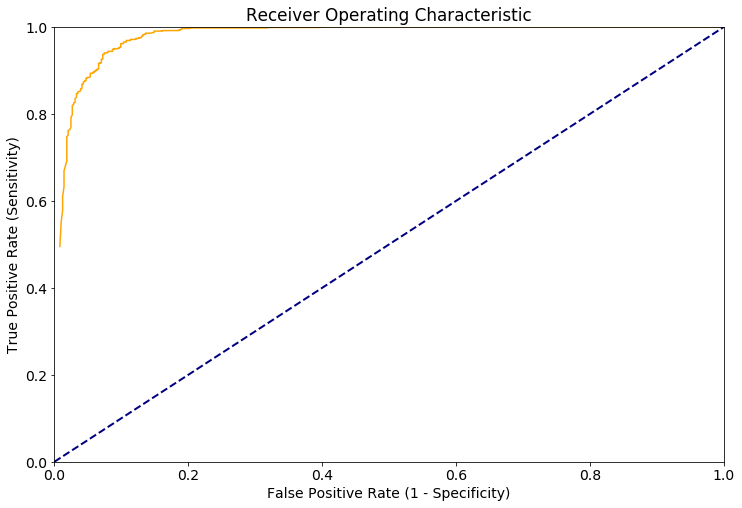

In [29]:
plt.figure(figsize = (12,8))
probabilities = gs.predict_proba(X_test)

roc(probas = probabilities, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.001); 

C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


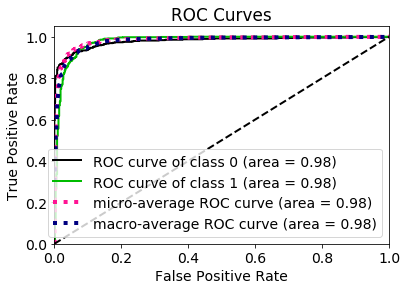

In [30]:
import scikitplot as skplt #to make things easy
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [31]:
probabilities

array([[3.94758864e-02, 9.60524114e-01],
       [9.81915652e-02, 9.01808435e-01],
       [4.30550403e-05, 9.99956945e-01],
       ...,
       [7.56590242e-05, 9.99924341e-01],
       [1.29351162e-04, 9.99870649e-01],
       [7.57506278e-01, 2.42493722e-01]])

In [32]:
preds = gs.predict(X_test)

In [33]:
preds[1:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[432  52]
 [ 29 807]]


In [36]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.9653


In [37]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.8926


In [38]:
prec = tp / (tp +fp)

print(f'Precision: {round(prec, 4)}')

Precision: 0.9395


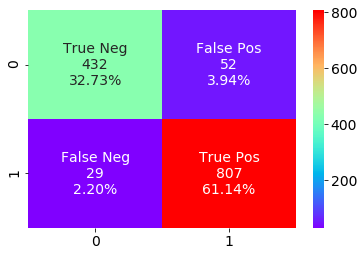

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
##### this code was found on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='rainbow')